In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()   

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [9]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [21]:
colunas = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 
           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 
           'Geography_Germany', 'Geography_Spain']

X = df[colunas]
y = df['Exited']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

## Modelo Random Forest

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred = model.predict(X_test)

In [27]:
matrix_confusao = confusion_matrix(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)
acurracia = accuracy_score(y_test, y_pred)

In [28]:
print(matrix_confusao)
print(relatorio_classificacao)
print(acurracia)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


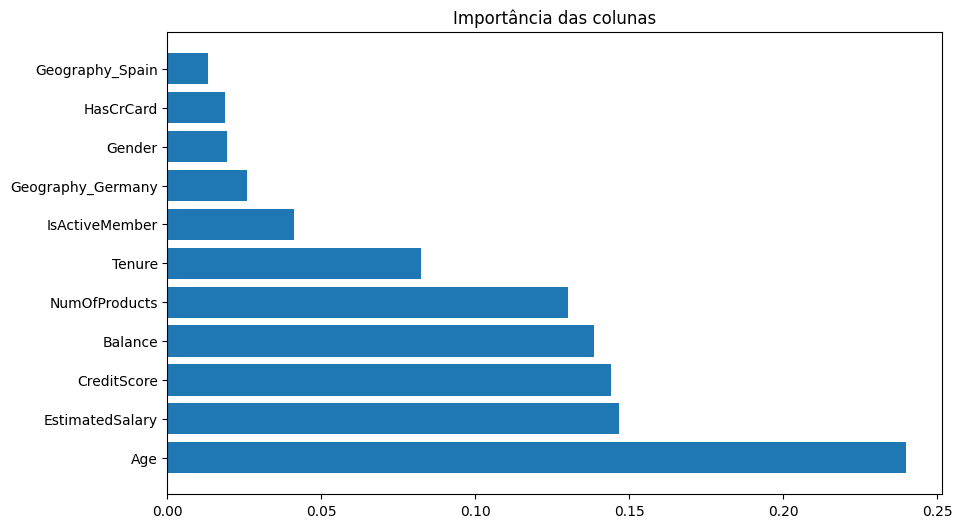

In [29]:
importancia = model.feature_importances_
indices = np.argsort(importancia)[::-1]
nomes = [colunas[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Importância das colunas")
plt.barh(range(X.shape[1]), importancia[indices])
plt.yticks(range(X.shape[1]), nomes)
plt.show()

## Modelo Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# construção e treinamento do modelo de regressão logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# previsões do modelo de regressão logística
y_pred_log_reg = log_reg.predict(X_test)

# avaliação do modelo de regressão logística
matrix_confusao_log_reg = confusion_matrix(y_test, y_pred_log_reg)
relatorio_classificacao_log_reg = classification_report(y_test, y_pred_log_reg)
acurracia_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(matrix_confusao_log_reg, relatorio_classificacao_log_reg, acurracia_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


## Modelo SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score

# construção e treinamento do modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# previsões do modelo SVM
y_pred_svm = svm_model.predict(X_test)

# avaliação do modelo SVM
matrix_confusao_svm = confusion_matrix(y_test, y_pred_svm)
relatorio_classificacao_svm = classification_report(y_test, y_pred_svm)
acurracia_svm = accuracy_score(y_test, y_pred_svm)

print(matrix_confusao_svm, relatorio_classificacao_svm, acurracia_svm)

precisão_svm = precision_score(y_test, y_pred_svm, average='macro', zero_division=0)
print("Precisão do modelo SVM:", precisão_svm)


[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035
Precisão do modelo SVM: 0.40175


c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

### explicação do precision_score
A fórmula da precisão é:

$$\text{Precisão} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Positivos}}$$

Se o modelo nunca previu uma classe específica, o denominador torna-se zero, tornando o cálculo impossível.

Para resolver o problema, ajuste o parâmetro zero_division. Nas funções do Scikit-Learn (como precision_score), você pode definir zero_division=0 ou zero_division=1 para evitar um warning.

## Modelo K-vizinhos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# construção e treinamento do modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# previsões do modelo KNN
y_pred_knn = knn_model.predict(X_test)

# avaliação do modelo KNN
matrix_confusao_knn = confusion_matrix(y_test, y_pred_knn)
relatorio_classificacao_knn = classification_report(y_test, y_pred_knn)
acurracia_knn = accuracy_score(y_test, y_pred_knn)

print(matrix_confusao_knn, relatorio_classificacao_knn, acurracia_knn)

[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


## Modelo XGBoost

In [40]:
from xgboost import XGBClassifier

# Construção e treinamento do modelo XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Previsões do modelo
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação do modelo
matrix_confusao_xgb = confusion_matrix(y_test, y_pred_xgb)
relatorio_classificacao_xgb = classification_report(y_test, y_pred_xgb)
acuracia_xgb = accuracy_score(y_test, y_pred_xgb)

print(matrix_confusao_xgb)
print(relatorio_classificacao_xgb)
print(acuracia_xgb)

[[1521   86]
 [ 175  218]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1607
           1       0.72      0.55      0.63       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000

0.8695


## Melhorando nossos resultados

In [44]:
df = pd.read_csv('Churn_Modelling.csv')

# feature binaria para balance
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

# grupos de idade
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], 
                        labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

# Balance para Salary ratio
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Interação de entre NumOfProducts e IsActiveMember
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

# Tenure grouping
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10], labels=['0-2', '3-5', '6-7', '8-10'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceZero,AgeGroup,BalanceSalaryRatio,ProductUsage,TenureGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,36-45,0.000000,1,0-2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,36-45,0.744677,1,0-2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,36-45,1.401375,0,8-10
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,36-45,0.000000,0,0-2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,36-45,1.587055,1,0-2


In [45]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

In [46]:
colunas = ['CreditScore', 'Age', 'Tenure', 'Balance', 
           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 
           'Geography_Germany', 'Geography_Spain', 'BalanceZero', 'BalanceSalaryRatio',
           'ProductUsage', 'Male_Germany', 'Male_Spain'] + [col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]

X = df[colunas]
y = df['Exited']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### random forest

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
matrix_confusao = confusion_matrix(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)
acuracia = accuracy_score(y_test, y_pred)

In [50]:
print(matrix_confusao)
print(relatorio_classificacao)
print(acuracia)

[[1549   58]
 [ 201  192]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.77      0.49      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

0.8705


### XGBoost

In [51]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Previsões do modelo
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação do modelo
matrix_confusao_xgb = confusion_matrix(y_test, y_pred_xgb)
relatorio_classificacao_xgb = classification_report(y_test, y_pred_xgb)
acuracia_xgb = accuracy_score(y_test, y_pred_xgb)

print(matrix_confusao_xgb)
print(relatorio_classificacao_xgb)
print(acuracia_xgb)

[[1503  104]
 [ 194  199]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.66      0.51      0.57       393

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

0.851


### Regressão Logística

In [52]:
# construção e treinamento do modelo de regressão logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# previsões do modelo de regressão logística
y_pred_log_reg = log_reg.predict(X_test)

# avaliação do modelo de regressão logística
matrix_confusao_log_reg = confusion_matrix(y_test, y_pred_log_reg)
relatorio_classificacao_log_reg = classification_report(y_test, y_pred_log_reg)
acurracia_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(matrix_confusao_log_reg, relatorio_classificacao_log_reg, acurracia_log_reg)

[[1550   57]
 [ 306   87]]               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1607
           1       0.60      0.22      0.32       393

    accuracy                           0.82      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.79      0.82      0.78      2000
 0.8185
